In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import scale as scale

In [112]:
data=pd.read_csv('Q04_Wholesale+customers+data.csv')

## 1) Perform EDA  

In [4]:
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.shape

(440, 8)

In [28]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [93]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


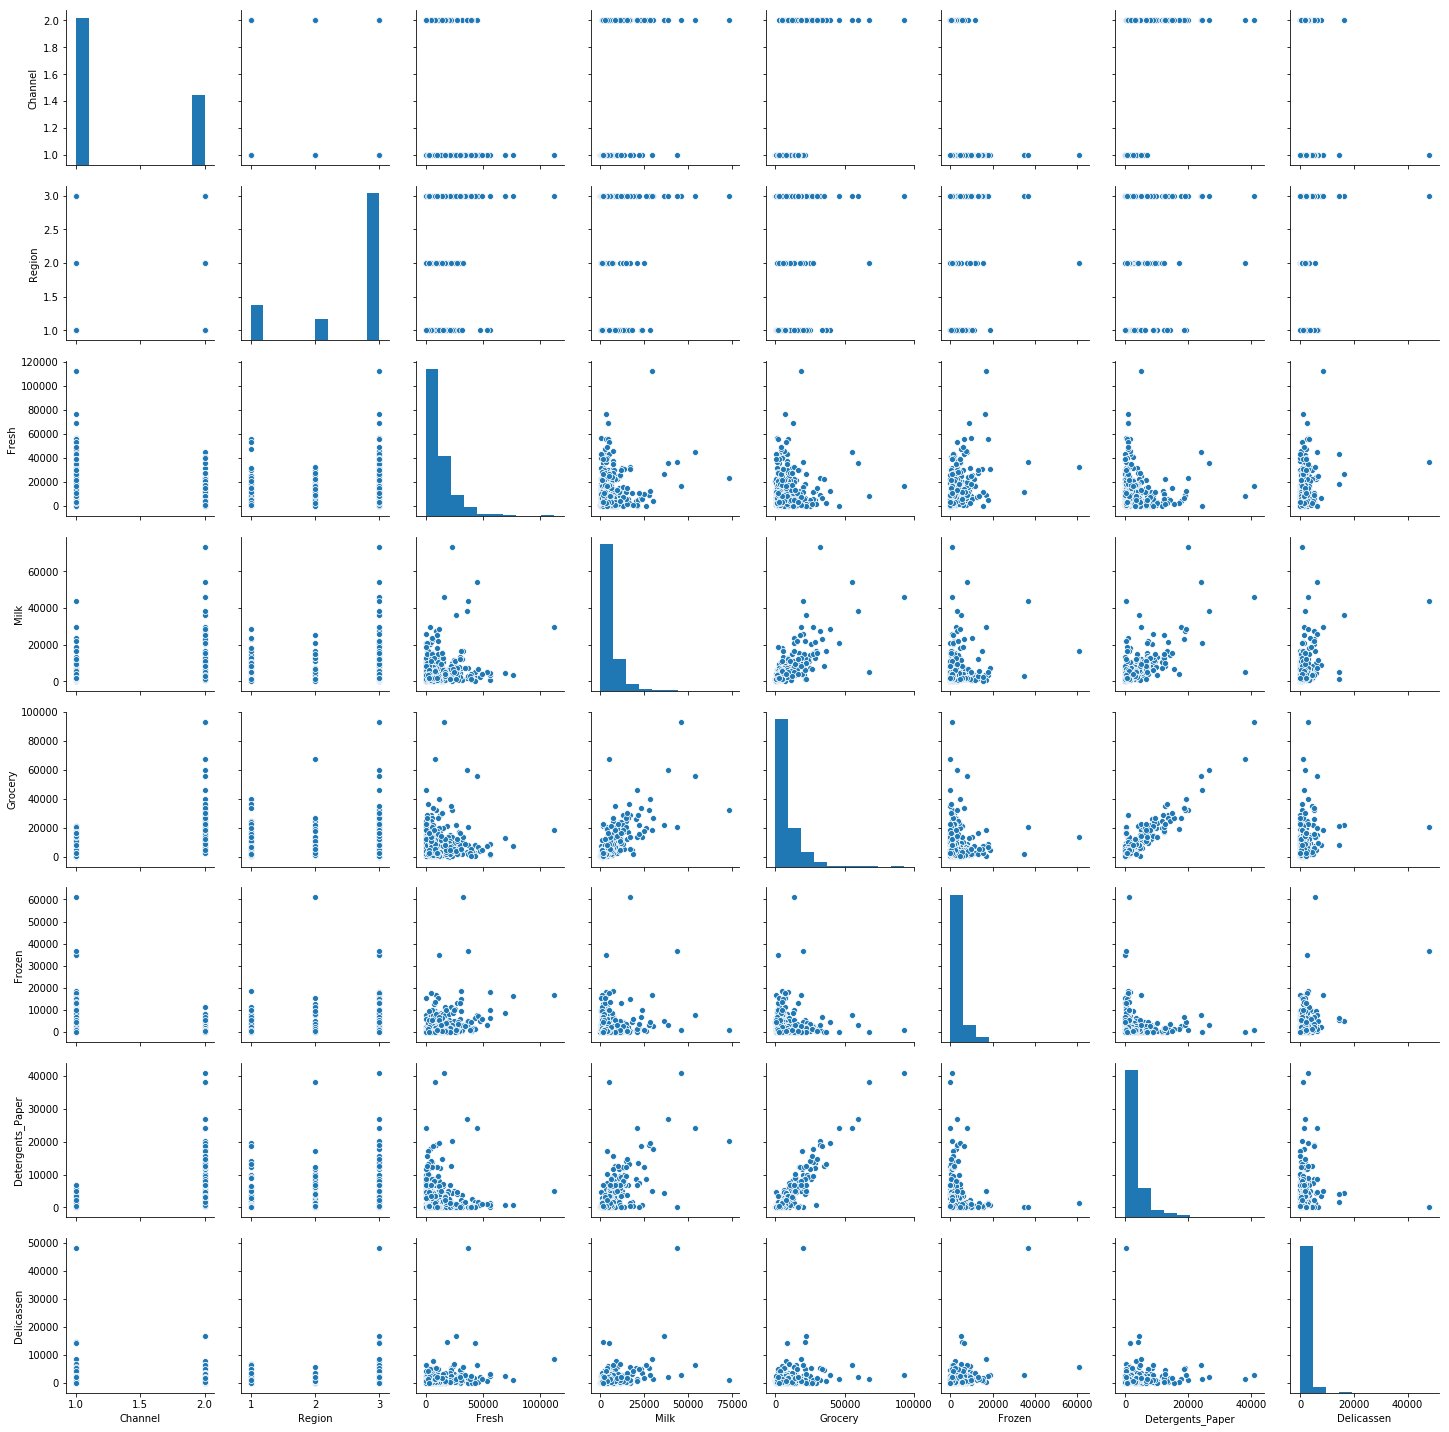

In [10]:
sns.pairplot(data)
plt.show()

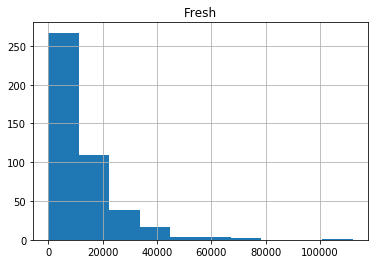

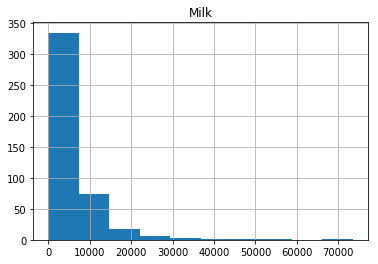

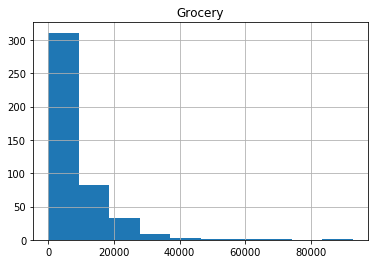

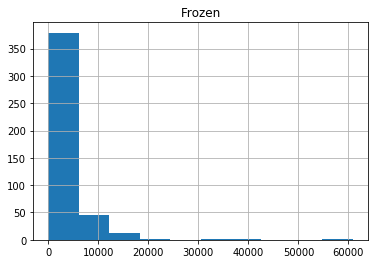

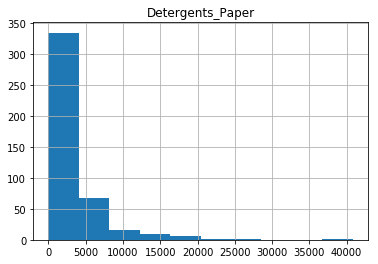

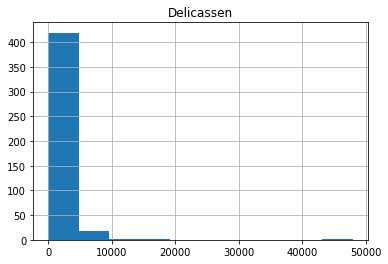

In [41]:
for i in data.iloc[:,2:8]:
    data.hist(column=i)
    plt.show()
  

In [65]:
for i in data.iloc[:,2:8]:
    print('skewness for:',data.loc[:,i].skew())
    print(i)

skewness for: 2.561322751927935
Fresh
skewness for: 4.053754849210881
Milk
skewness for: 3.5874286903915453
Grocery
skewness for: 5.9079856924559575
Frozen
skewness for: 3.6318506306913645
Detergents_Paper
skewness for: 11.151586478906117
Delicassen


In [ ]:
Delicassen is highly skewed

In [37]:
#sns.pairplot(data,hue='Channel')
#plt.show()

In [38]:
#sns.pairplot(data,hue='Region')
#plt.show()

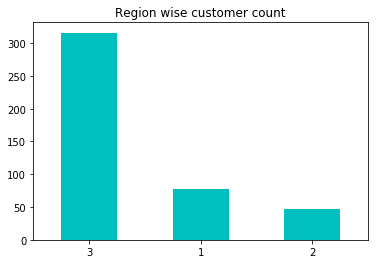

In [13]:
data.Region.value_counts().plot(kind='bar',rot = 0, title='Region wise customer count', color='c');

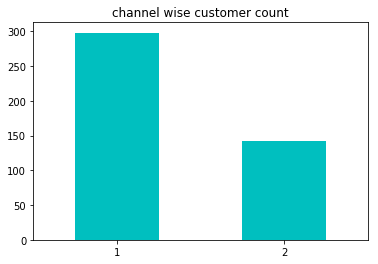

In [14]:
data.Channel.value_counts().plot(kind='bar',rot = 0, title='channel wise customer count', color='c');

In [16]:
# Grouping channel and region

data.groupby(["Channel","Region"]).size().unstack()

Region,1,2,3
Channel,,,
1,59,28,211
2,18,19,105


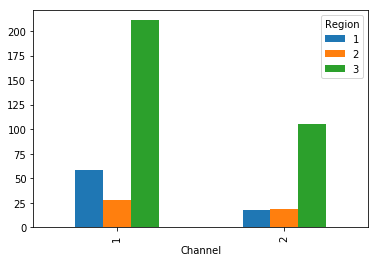

In [17]:

data.groupby(["Channel","Region"]).size().unstack().plot(kind='bar');

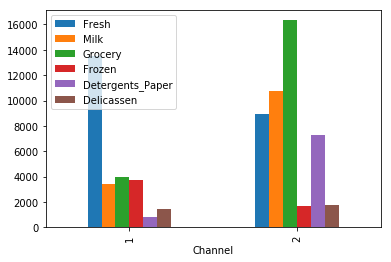

In [35]:
data.groupby(['Channel'])['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'].mean().plot(kind='bar');

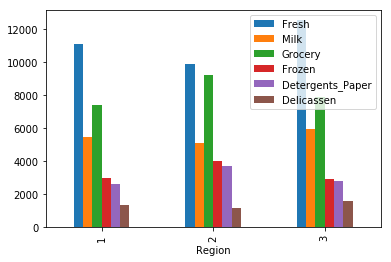

In [36]:
data.groupby(['Region'])['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'].mean().plot(kind='bar');

### 2) Do Feature Scaling 

In [70]:
from sklearn.preprocessing import scale as scale
scaled_data = scale(data)

C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [74]:
scaled_data.shape

(440, 8)

### 3) Do Outlier Detection 

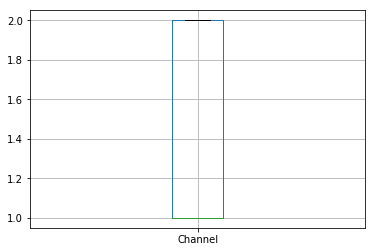

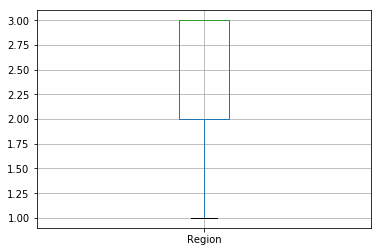

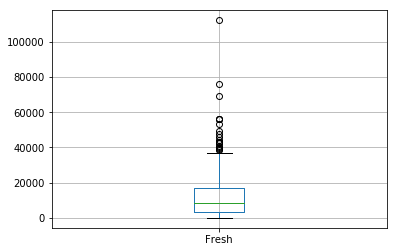

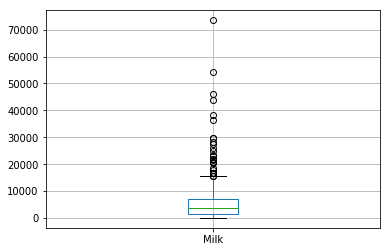

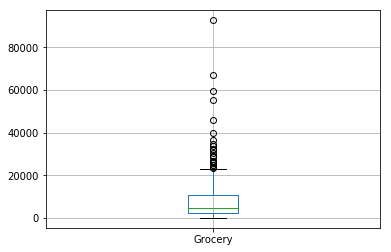

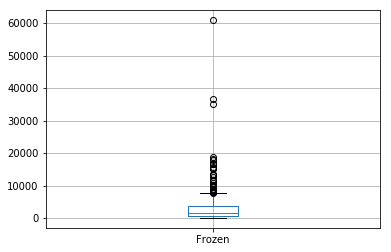

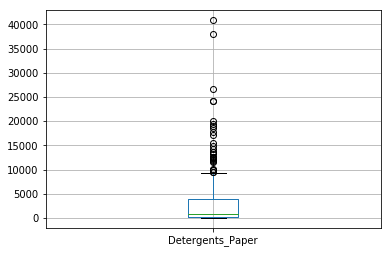

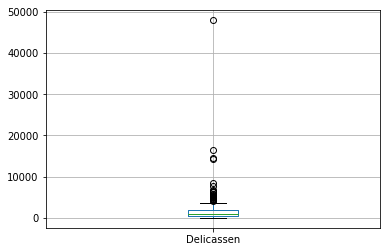

In [77]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [94]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [104]:
Q1 = data.Fresh.quantile(0.25)
Q3 = data.Fresh.quantile(0.75)
IQR = Q3 - Q1
datanew= data[(data.Fresh >= Q1 - 1.5*IQR) & (data.Fresh <= Q3 + 1.5*IQR)]

In [105]:
Q1 = data.Milk.quantile(0.25)
Q3 = data.Milk.quantile(0.75)
IQR = Q3 - Q1
datanew= data[(data.Milk >= Q1 - 1.5*IQR) & (data.Milk <= Q3 + 1.5*IQR)]

In [106]:
Q1 = data.Grocery.quantile(0.25)
Q3 = data.Grocery.quantile(0.75)
IQR = Q3 - Q1
datanew= data[(data.Grocery >= Q1 - 1.5*IQR) & (data.Grocery <= Q3 + 1.5*IQR)]

In [107]:
Q1 = data.Frozen.quantile(0.25)
Q3 = data.Frozen.quantile(0.75)
IQR = Q3 - Q1
datanew= data[(data.Frozen >= Q1 - 1.5*IQR) & (data.Frozen <= Q3 + 1.5*IQR)]

In [108]:
Q1 = data.Detergents_Paper.quantile(0.25)
Q3 = data.Detergents_Paper.quantile(0.75)
IQR = Q3 - Q1
datanew= data[(data.Detergents_Paper >= Q1 - 1.5*IQR) & (data.Detergents_Paper <= Q3 + 1.5*IQR)]

In [109]:
Q1 = data.Delicassen.quantile(0.25)
Q3 = data.Delicassen.quantile(0.75)
IQR = Q3 - Q1
datanew= data[(data.Delicassen >= Q1 - 1.5*IQR) & (data.Delicassen <= Q3 + 1.5*IQR)]

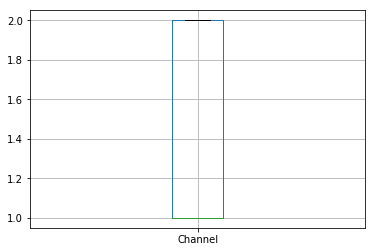

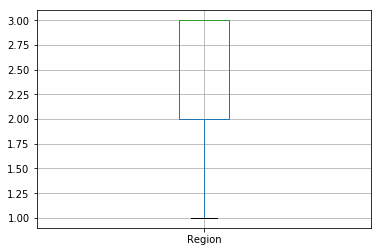

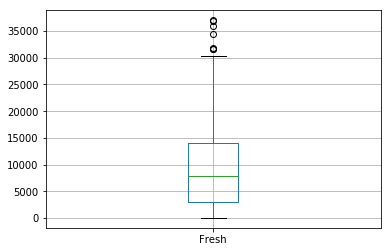

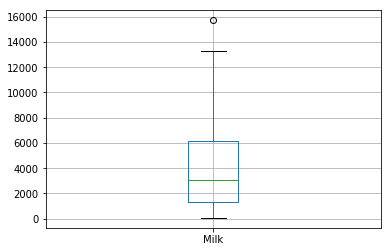

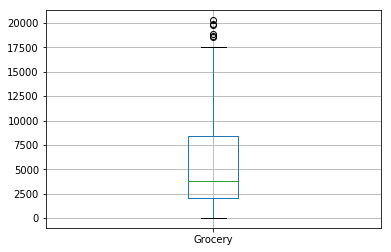

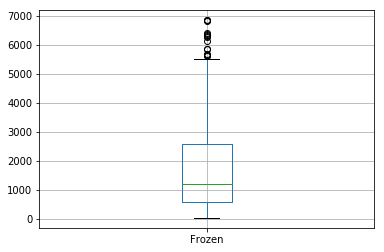

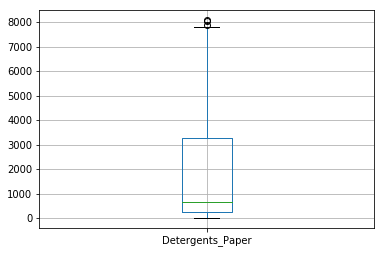

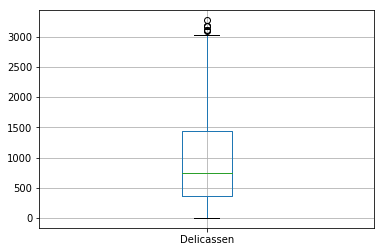

In [110]:
for i in datanew.columns:
    data.boxplot(column=i)
    plt.show()

In [113]:
datanew.shape,data.shape

((311, 8), (440, 8))

### 4)Use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. – 10 marks

In [141]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [115]:
from sklearn.preprocessing import scale as scale
scaled_datanew = scale(datanew)

C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [117]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(scaled_datanew)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [118]:
pca.components_

array([[ 0.46609128,  0.09721614, -0.08109358,  0.46202421,  0.5002034 ,
        -0.15412153,  0.49946294,  0.17275786],
       [-0.0058271 , -0.0077477 ,  0.65590864,  0.08658354,  0.05043059,
         0.47227547, -0.07061066,  0.57586451],
       [ 0.02419814, -0.95260741, -0.08532541,  0.06430324,  0.08254195,
         0.22492814,  0.11187881, -0.10303169],
       [ 0.12833685,  0.27922001, -0.26940859, -0.03003094,  0.01902523,
         0.82818729,  0.16547286, -0.34415925],
       [ 0.17711534,  0.00705157,  0.68581032,  0.00233416,  0.08069677,
        -0.10840151,  0.06678558, -0.6895767 ],
       [-0.61731096,  0.05847256, -0.01019856,  0.740883  ,  0.10310212,
         0.05346415, -0.14810587, -0.17627448],
       [-0.55753294,  0.03943829,  0.05137673, -0.46772154,  0.57003153,
        -0.01051699,  0.37552771,  0.01144618],
       [ 0.20587233, -0.0063373 , -0.10132575, -0.07952138,  0.63087258,
         0.04467292, -0.73364572, -0.05247797]])

In [121]:
colnames = list(datanew.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.466091,-0.005827,Channel
1,0.097216,-0.007748,Region
2,-0.081094,0.655909,Fresh
3,0.462024,0.086584,Milk
4,0.500203,0.050431,Grocery


##  screeplot to identify the number of needed principal components

In [122]:
pca.explained_variance_ratio_

array([0.42131724, 0.16837033, 0.12434665, 0.10197987, 0.08766069,
       0.04696518, 0.03343263, 0.01592741])

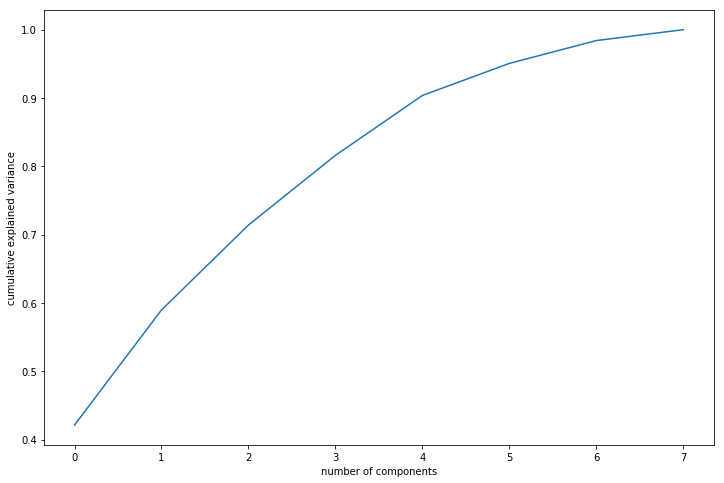

In [123]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### 5) Do K means clustering – 10 marks

In [124]:
from sklearn.cluster import KMeans

In [125]:
# Identify the optimal number of clusters
cluster_range = range( 1, 10 )
cluster_wss = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(scaled_datanew)
    cluster_wss.append( clusters.inertia_ )
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:10]

,num_clusters,cluster_wss
0,1,2488.000000
1,2,1636.100779
2,3,1410.855540
3,4,1236.236450
4,5,1127.443177
5,6,1048.406981
6,7,979.898296
7,8,939.479205
8,9,872.635633


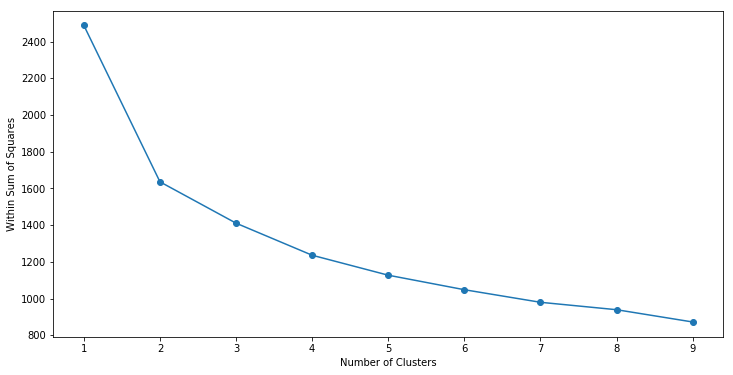

In [126]:
plt.figure(figsize=(12,6))
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.xticks(np.arange(min(clusters_df.num_clusters), 
                     max(clusters_df.num_clusters)+1, 
                     1.0))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_wss, 
         marker = "o" )

In [172]:
## Profiling the clusters

cluster = KMeans(n_clusters=2, random_state=10)
cluster_labels = cluster.fit_predict(scaled_datanew)
cluster_labels
datanew['Clusters'] = cluster_labels

clus_profile = datanew.iloc[:,2:9].groupby(['Clusters'],as_index=False).mean()
clus_profile

,Clusters,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,8255.056818,7566.636364,11432.647727,1221.772727,4750.318182,1200.477273
1,1,10228.008969,2526.179372,3176.878924,2016.417040,672.201794,830.520179


In [173]:
clus_profile.head(5)

,Clusters,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,8255.056818,7566.636364,11432.647727,1221.772727,4750.318182,1200.477273
1,1,10228.008969,2526.179372,3176.878924,2016.417040,672.201794,830.520179


In [174]:
datanew.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
3,1,3,13265,1196,4221,6404,507,1788,1
5,2,3,9413,8259,5126,666,1795,1451,0
6,2,3,12126,3199,6975,480,3140,545,0
7,2,3,7579,4956,9426,1669,3321,2566,0
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,0
10,2,3,3366,5403,12974,4400,5977,1744,0
11,2,3,13146,1124,4523,1420,549,497,1


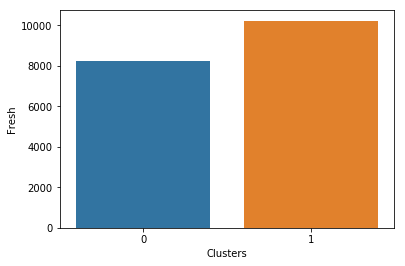

In [175]:
sns.barplot(x=clus_profile.Clusters, y=clus_profile.Fresh)
#sns.barplot(x=df.ClusterID, y=df.Amount_mean)

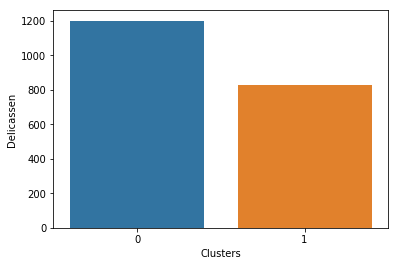

In [176]:
sns.barplot(x=clus_profile.Clusters, y=clus_profile.Delicassen)

6/ Explain what you have done and how this segments customers – 5 marks